# Visualization

In [77]:
from joblib import load

bs_dt_college = load('../../data/BSmodels/DecisionTree/bayes_search_college_model.joblib')
bs_dt_credit = load('../../data/BSmodels/DecisionTree/bayes_search_credit_model.joblib')
bs_dt_diabetes = load('../../data/BSmodels/DecisionTree/bayes_search_diabetes_model.joblib')
bs_dt_penguins = load('../../data/BSmodels/DecisionTree/bayes_search_penguins_model.joblib')

bs_kn_college = load('../../data/BSmodels/KNeighbors/bayes_search_college_model.joblib')
bs_kn_credit = load('../../data/BSmodels/KNeighbors/bayes_search_credit_model.joblib')
bs_kn_diabetes = load('../../data/BSmodels/KNeighbors/bayes_search_diabetes_model.joblib')
bs_kn_penguins = load('../../data/BSmodels/KNeighbors/bayes_search_penguins_model.joblib')

bs_xg_college = load('../../data/BSmodels/XGBoost/bayes_search_college_model.joblib')
bs_xg_credit = load('../../data/BSmodels/XGBoost/bayes_search_credit_model.joblib')
bs_xg_diabetes = load('../../data/BSmodels/XGBoost/bayes_search_diabetes_model.joblib')
bs_xg_penguins = load('../../data/BSmodels/XGBoost/bayes_search_penguins_model.joblib')

models = [bs_dt_college, bs_dt_credit, bs_dt_diabetes, bs_dt_penguins, bs_kn_college, bs_kn_credit, bs_kn_diabetes, bs_kn_penguins, bs_xg_college, bs_xg_credit, bs_xg_diabetes, bs_xg_penguins]
models



[BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessing',
                                          ColumnTransformer(transformers=[('num_pipeline',
                                                                           Pipeline(steps=[('num_impute',
                                                                                            SimpleImputer()),
                                                                                           ('scale',
                                                                                            MinMaxScaler())]),
                                                                           <sklearn.compose._column_transformer.make_column_selector object at 0x0000028440980410>),
                                                                          ('cat_pipeline',
                                                                           Pipeline(steps=[('cat_impute',
                                       

In [78]:
import pandas as pd

dt_results = pd.read_csv('../../data/RSmodels/dt_results.csv')
kn_results = pd.read_csv('../../data/RSmodels/knn_results.csv')
xg_results = pd.read_csv('../../data/RSmodels/xgb_results.csv')

rs_results = [dt_results, kn_results, xg_results]

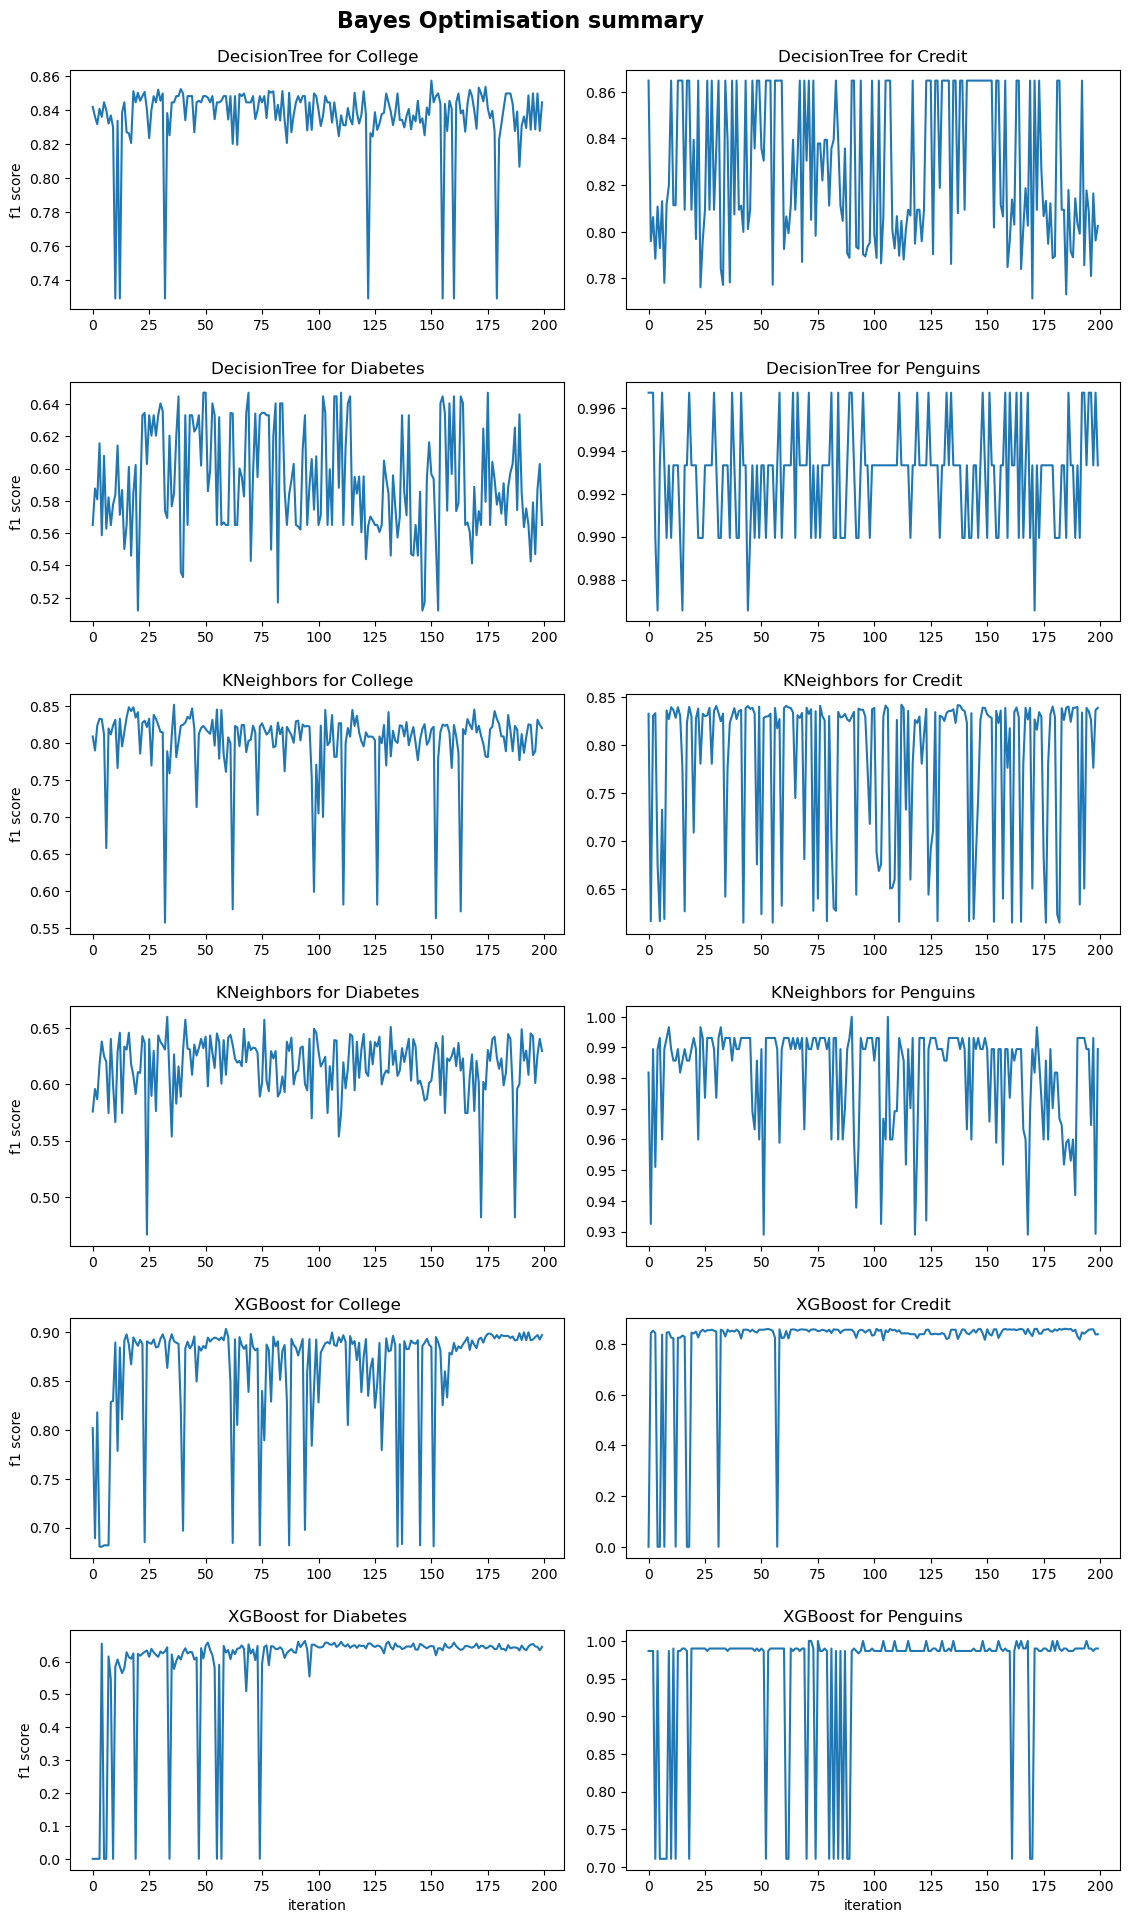

In [79]:
import matplotlib.pyplot as plt

model_names = ["DecisionTree", "KNeighbors", "XGBoost"]
dataset_names = ["College", "Credit", "Diabetes", "Penguins"]

num_models = len(models)

fig, axs = plt.subplots(6, 2, figsize=(15, 20))

axs = axs.ravel()

for row, model_name in enumerate(model_names):
    for col, dataset_name in enumerate(dataset_names):
        i = row * 4 + col  
        axs[i].plot(models[i].cv_results_['mean_test_score'])  
        axs[i].set_title(f"{model_name} for {dataset_name}")
        
        
        if i >= 10:
            axs[i].set_xlabel("iteration")
        
        if i % 2 == 0:
            axs[i].set_ylabel("f1 score")
            
            


fig.suptitle("Bayes Optimisation summary", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

fig.subplots_adjust(left=0.2, right=0.9, top=0.95, bottom=0.05)
plt.show()

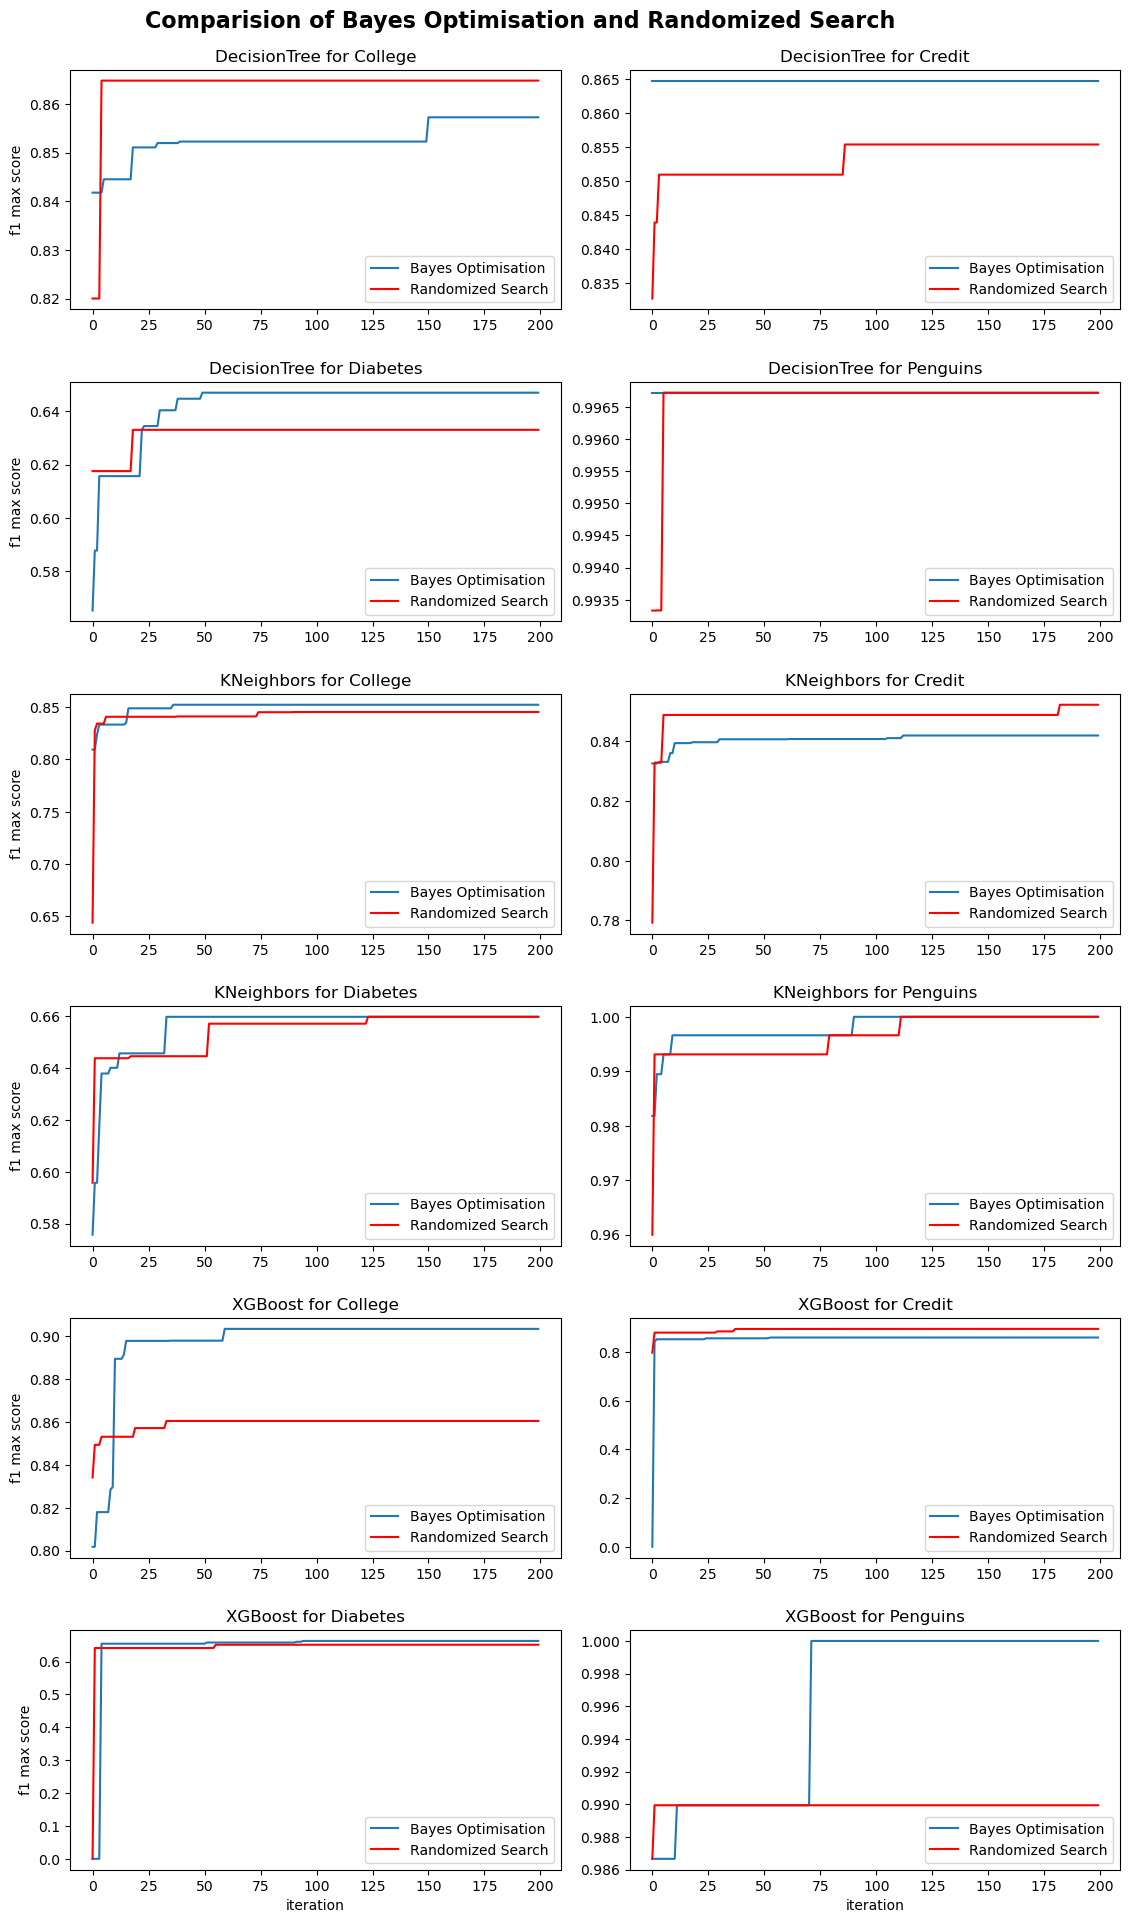

In [80]:
import numpy as np

fig, axs = plt.subplots(6, 2, figsize=(15, 20))
axs = axs.ravel()  

for row, model_name in enumerate(model_names):
    for col, dataset_name in enumerate(dataset_names):
        i = row * 4 + col  

        mean_test_score = models[i].cv_results_['mean_test_score']

        max_scores = np.maximum.accumulate(mean_test_score)

        axs[i].plot(np.arange(len(mean_test_score)), max_scores, label='Bayes Optimisation')

        axs[i].set_title(f"{model_name} for {dataset_name}")

        if i >= 10:
            axs[i].set_xlabel("iteration")
        
        if i % 2 == 0:
            axs[i].set_ylabel("f1 max score")

for row, model_name in enumerate(model_names):
    for col, dataset_name in enumerate(dataset_names):
        i = row * 4 + col  
        result = rs_results[row]
        
        mean_test_score = result.iloc[:, -5 + col]

        max_scores = np.maximum.accumulate(mean_test_score)

        axs[i].plot(np.arange(len(mean_test_score)), max_scores, color = 'red', label='Randomized Search')

        axs[i].set_title(f"{model_name} for {dataset_name}")
        axs[i].legend()
        
fig.suptitle("Comparision of Bayes Optimisation and Randomized Search", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

fig.subplots_adjust(left=0.2, right=0.9, top=0.95, bottom=0.05)

plt.show()

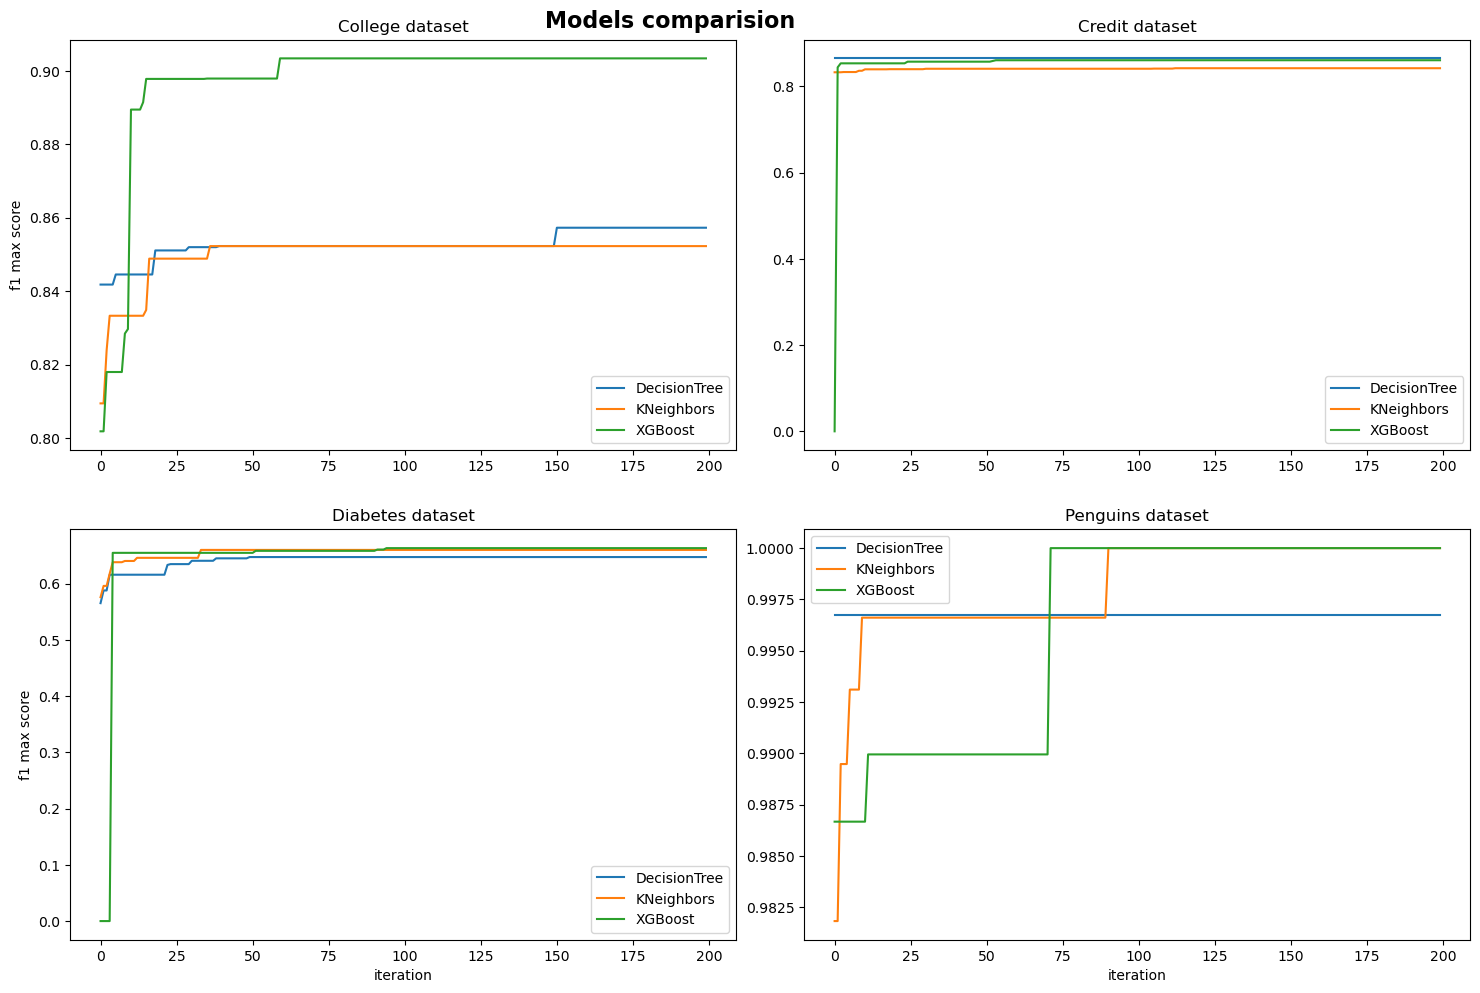

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.ravel()  
for i, dataset_name in enumerate(dataset_names):
    for j, model_name in enumerate(model_names):

        mean_test_score = models[i + 4 * j].cv_results_['mean_test_score']

        max_scores = np.maximum.accumulate(mean_test_score)

        axs[i].plot(np.arange(len(mean_test_score)), max_scores, label=model_name)

        axs[i].set_title(f"{dataset_name} dataset")

        if i >= 2:
            axs[i].set_xlabel("iteration")
        
        if i % 2 == 0:
            axs[i].set_ylabel("f1 max score")
        
        axs[i].legend()
      
fig.suptitle("Models comparision", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

fig.subplots_adjust(left=0.2, right=0.9, top=0.95, bottom=0.05)

plt.show()

C:\Users\flang\AppData\Local\Temp\ipykernel_11764\2947879114.py:11: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat([df, tmp], ignore_index=True)
C:\Users\flang\AppData\Local\Temp\ipykernel_11764\2947879114.py:11: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat([df, tmp], ignore_index=True)
C:\Users\flang\AppData\Local\Temp\ipykernel_11764\2947879114.py:11: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result 

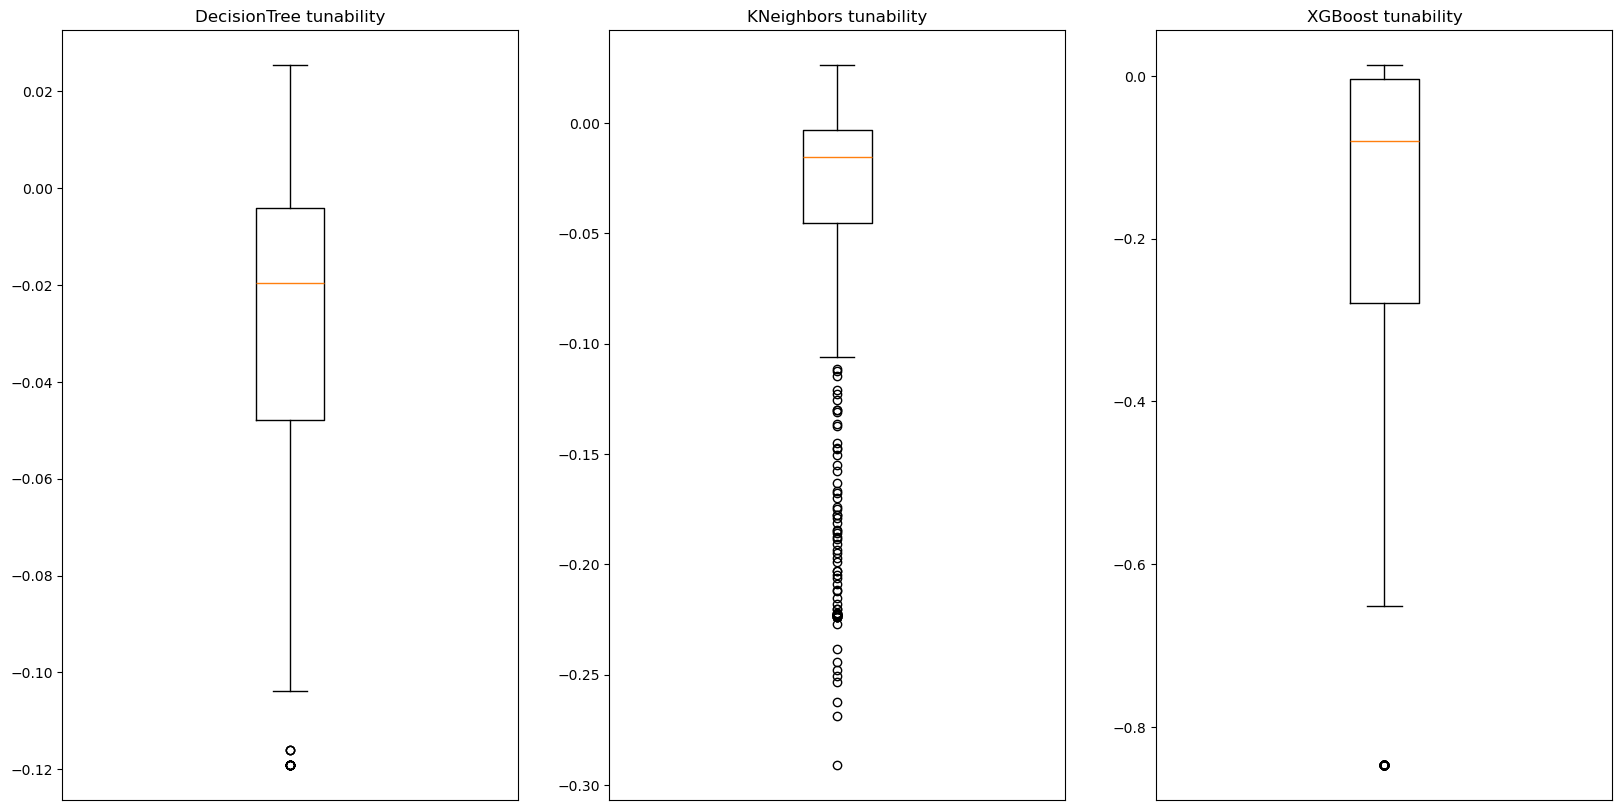

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs = axs.ravel()  

for i, result in enumerate(rs_results):
    model_name = model_names[i]
    sigma_star_row = result[result['mean_f1'] == max(result['mean_f1'])]
    df = pd.Series()
    for j, dataset_name in enumerate(dataset_names):
        best_f1 = sigma_star_row.iloc[0, -5 + j]
        tmp = result.iloc[:, -5 + j] - best_f1
        df = pd.concat([df, tmp], ignore_index=True)
    
    axs[i].boxplot(df)
    axs[i].set_xticks([])
    axs[i].set_title(f"{model_name} tunability")
    
        

        
    